## Parte #1: suavizar función con filtro savgol

In [1]:
#script externo
import Recursos
#Tratamientos de datos
import numpy as np
#Gráficos
import matplotlib.pyplot as plt
import scipy.stats as stats
#Graficos interactivos
from ipywidgets import interact 
#Modelos
from sklearn.mixture import GaussianMixture
import seaborn as sns
import pandas as pd
#Filtros
from scipy.signal import savgol_filter


Caso #1: imagen con 2 espectros

In [80]:
NOMBRE_IMG1 = 'C1265-HD136488.fits'

datos, clusters = Recursos.getInfo(NOMBRE_IMG1)
Y = np.sum(Recursos.normalize(datos), axis=0) 

In [25]:
def apply_filter_savgol(window_length, polyorder, mode):
    #aplicar filtro
    Y_fil = savgol_filter(Y, window_length= window_length, polyorder= polyorder, mode= mode)
    #generar nuevos datos reduciendo valores sin relevancia (extremos)
    Y_nuevo = (Recursos.generar_nuevos_datos(Y_fil)) #modificar
    Y_nuevo2 = (Recursos.generar_nuevos_datos_reduc(Y_fil)) #modificar
    
    #graficar resultados - nuevos data sets generados
    ax = sns.kdeplot(Y_nuevo, shade=False, label="nuevo (kde)", color= 'black')
    ax2 = sns.kdeplot(Y_nuevo2, shade=False, label="nuevo reduc. (kde)", color= 'red')
      
    #ajustar eje Y
    #ax3 = ax2.twinx()
    #original
    #ax3.plot(Y, ls='-', label="original",color="grey")
    
    #ax4 = ax2.twinx()
    #filtrada
    #ax4.plot(Y_fil, ls='-', label="func. suavizada",color="orange")
    #ax3.set_ylabel("Datos")
    
    plt.legend(loc=2)
    plt.show()

In [4]:
windows = [51,71,91,111,131,151]
orders = np.arange(2,6,1) #2..5
modes = ['interp', 'nearest', 'mirror', 'constant', 'wrap']

In [ ]:
interact(apply_filter_savgol,
         window_length = windows,
         polyorder = orders, 
         mode = modes) 

In [38]:
#para realizar un cambio del tamaño de figuras -pyplot- en el entorno
plt.rcParams["figure.figsize"] = [10, 5]

In [48]:
@interact
def apply_filter_savgol_modes(polyorder = orders):
    col = 1
    fil = 5
    fig = plt.figure(figsize=(10,30))
    for indice, mode in enumerate(modes):
        fig.add_subplot(fil,col,indice+1)
        plt.title(mode)
            
        for window_length in windows:
            #aplicar filtro
            Y_fil = savgol_filter(Y, window_length= window_length, 
                                  polyorder= polyorder, 
                                  mode= mode)
            plt.plot(Y_fil, label= "win_"+str(window_length) , ls='-.')
        plt.plot(Y, label="funcion")
        fig.tight_layout() 
        plt.legend(loc=2)
    plt.show()

interactive(children=(Dropdown(description='polyorder', options=(2, 3, 4, 5), value=2), Output()), _dom_classe…

Observaciones: 
No hay una gran diferencia entre los principales modos interp y nearest.
Es suficiente con aplicar un order de 2, ya que aumentar el grado no aporta un suavizado general. Es decir, va presentando relieves en los picos mismos.

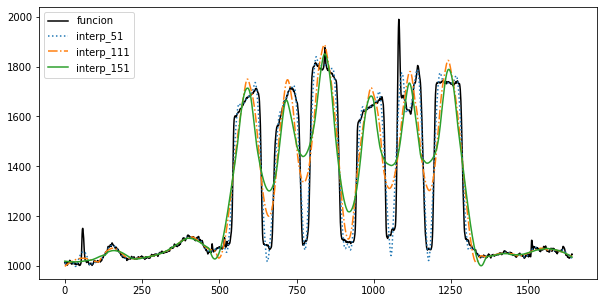

In [61]:
y_interp1 = savgol_filter(Y, window_length= 51, 
                                  polyorder= 2, 
                                  mode= 'interp')

y_interp2 = savgol_filter(Y, window_length= 111, 
                                  polyorder= 2, 
                                  mode= 'interp')
y_interp3 = savgol_filter(Y, window_length= 151, 
                                  polyorder= 2, 
                                  mode= 'interp')

plt.plot(Y, label= "funcion", color="black")
plt.plot(y_interp1, label= "interp_51", ls=":")
plt.plot(y_interp2, label= "interp_111", ls="-.")
plt.plot(y_interp3, label= "interp_151", ls="-")
plt.legend(loc=2)
plt.show()

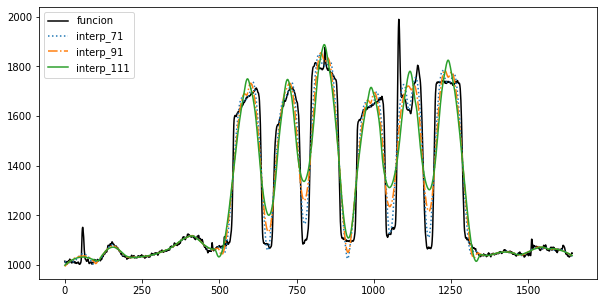

In [60]:
y_interp1 = savgol_filter(Y, window_length= 71, 
                                  polyorder= 2, 
                                  mode= 'interp')

y_interp2 = savgol_filter(Y, window_length= 91, 
                                  polyorder= 2, 
                                  mode= 'interp')
y_interp3 = savgol_filter(Y, window_length= 111, 
                                  polyorder= 2, 
                                  mode= 'interp')

plt.plot(Y, label= "funcion", color="black")
plt.plot(y_interp1, label= "interp_71", ls=":")
plt.plot(y_interp2, label= "interp_91", ls="-.")
plt.plot(y_interp3, label= "interp_111", ls="-")
plt.legend(loc=2)
plt.show()

Observación: el ajuste de los hiperparámetros queda mejor con window > 51 ya que menor a este valor aún se presenta ciertos picos.
Y si se analiza los valores de window menores a 111, se puede ver que la mejor opción es 111 ya que menores a este presente pequeños relieves minúsculos.

Se grafica la districión generada a partir de la función suavizada elegida (obtenida en el paso previo):

Dimension de los nuevos datos: (446340,)
Dimension de los nuevos datos: (387427,)
912 datos eliminados


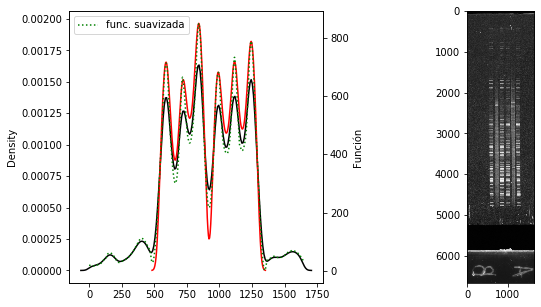

In [76]:
Y_nuevo = (Recursos.generar_nuevos_datos(y_interp3)) 
Y_nuevoRed = (Recursos.generar_nuevos_datos_reduc(y_interp3)) 
    
fig, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2)
#graficar resultados - nuevos data sets generados
sns.kdeplot(Y_nuevo, shade=False, label="nuevo", color= 'black', ax= ax1)
sns.kdeplot(Y_nuevoRed, shade=False, label="nuevo reduc.", color= 'red', ax= ax1)
ax3 = ax1.twinx()
ax3.plot(y_interp3, ls=':', label="func. suavizada",color="green")
ax3.set_ylabel("Función")
ax2.imshow(datos, cmap="gray")
plt.legend(loc=2)
plt.show()

Graficar el nuevo data set generado vs uno reducido, donde se genera datos únicamente cuando el valor es superior a la media, se puede notar que se asemeja a la función suavizada en ciertas zonas. A su vez, al reducir se descarta la información que no es relevante (extremos de la imagen).

caso #2: imagen con 4 espectros

In [120]:
NOMBRE_IMG2 = 'C4747-HD93129A.fits'
datos, clusters = Recursos.getInfo(NOMBRE_IMG2)
Y = np.sum(Recursos.normalize(datos), axis=0) 

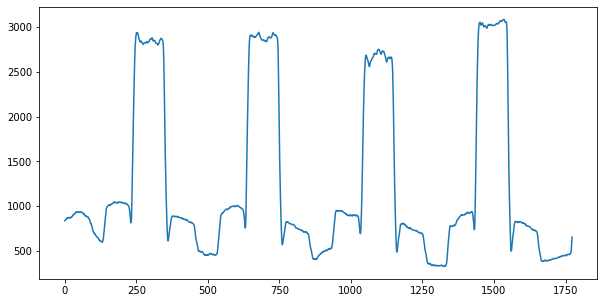

In [68]:
plt.plot(Y)

Dimension de los nuevos datos: (1829262,)
Dimension de los nuevos datos: (1233089,)
1211 datos eliminados


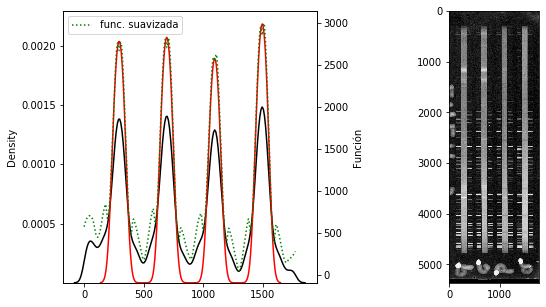

In [121]:
y_suave = savgol_filter(Y, window_length= 111, polyorder= 2, mode= 'interp')
Y_nuevo = (Recursos.generar_nuevos_datos(y_suave)) 
Y_nuevoRed = (Recursos.generar_nuevos_datos_reduc(y_suave)) 
    
fig, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2)
#graficar resultados - nuevos data sets generados
sns.kdeplot(Y_nuevo, shade=False, label="nuevo", color= 'black', ax= ax1)
sns.kdeplot(Y_nuevoRed, shade=False, label="nuevo reduc.", color= 'red', ax= ax1)
ax3 = ax1.twinx()
ax3.plot(y_suave, ls=':', label="func. suavizada",color="green")
ax3.set_ylabel("Función")
ax2.imshow(datos, cmap="gray")
plt.legend(loc=2)
plt.show()

Observación: dado que las lámparas en la imagen no poseen una mayor presencia respecto al espectro de cada uno, sus valores en la función de análisis es menor a la media. Por eso, se descarta al generar el nuevo data set reducido.

Opciones a plantear: 
a- aplicar filtros que realcen o equiparen la luminicidad dentro de la imagen.
b- descartar imagen como caso de análisis manual.
c- modificar hiperparámetros en el filtro savgol para tales casos.

## Parte 2: métrica BIC 

In [ ]:
Caso #1 - continuación

In [88]:
y_suave = savgol_filter(Y, window_length= 111, polyorder= 2, mode= 'interp')

Y_ant = Recursos.generar_nuevos_datos(Y)
Y_nuevo = Recursos.generar_nuevos_datos(y_suave)
Y_nuevoRed = Recursos.generar_nuevos_datos_reduc(y_suave)
 
Y_copias = [Y_ant, Y_nuevo, Y_nuevoRed]

Dimension de los nuevos datos: (510561,)
Dimension de los nuevos datos: (515488,)
Dimension de los nuevos datos: (410542,)
957 datos eliminados


In [101]:
labels = ["ant","suav", "suavRed"]
N = np.arange(1, 15) 

BIC minimos:
ant: 12
suav: 13
suavRed: 13


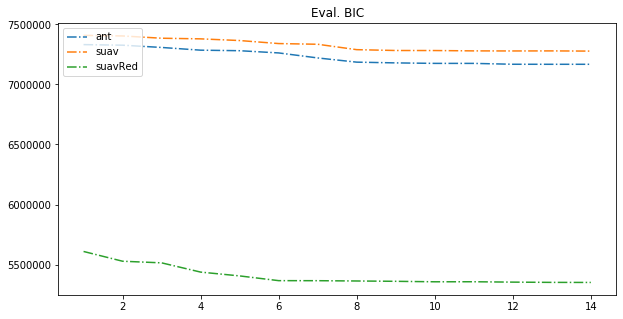

In [102]:
print("BIC minimos:")
for ind, Y_copia in enumerate(Y_copias):
    Y_copia = Y_copia.reshape(-1,1)
    modelos = [None for i in range(len(N))]
    for i in range(len(N)):
        modelos[i] = GaussianMixture(N[i]).fit(Y_copia)
    BIC = [m.bic(Y_copia) for m in modelos]
    
    plt.plot(N, BIC, '-.', label= labels[ind])
    print(labels[ind]+": "+str(np.argmin(BIC))) 
plt.title("Eval. BIC")
plt.legend(loc=2)
plt.show()

Observación: No hay diferencia entre los valores bic minimos.
Otra opción es tomar en cuenta el punto de inflexión de la curva bic de la funcion suavRed.

In [104]:
Y_copia = Y_nuevoRed.copy().reshape(-1,1)
modelos = [None for i in range(len(N))]
for i in range(len(N)):
    modelos[i] = GaussianMixture(N[i]).fit(Y_copia)
BIC = [m.bic(Y_copia) for m in modelos]

bic min: 13


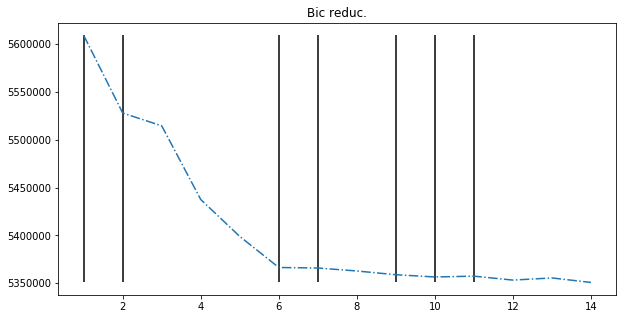

In [115]:
print("bic min: "+str(np.argmin(BIC))) 

plt.plot(N, BIC, '-.')
p_infls = np.where(np.diff(np.sign( np.gradient(np.gradient(BIC)))))[0]
#for p in p_infls:
#    plt.plot(p, marker=11)
plt.vlines(p_infls,min(BIC), max(BIC))
plt.title("Bic reduc.")
plt.show()


In [119]:
modelos[np.argmin(BIC)].score(Y_copia) 

-6.51610868116403

comparación con el resto de casos:

In [ ]:
planilla = pd.read_csv('documents/planilla_imagenes_2.csv',  sep=';')
df = pd.DataFrame(planilla.values, columns = list(planilla))
#se obtiene la lista de imagenes disponibles - conjunto de 72
listaNombres = []
for tupla in df.itertuples():
    nombreImg = Recursos.obtenerNombre(tupla.PLATE_N, tupla.OBJECT)
    listaNombres.append(nombreImg)
labels = ["ant","suav", "suavRed"]
modelos_bic = []

In [ ]:
def graficar_modelo(modelo, comp_bic, Y_nuevo, y_suave, y, img, nombre):
    """recibe modelos_bic[nro], info[4], y_nuevo, datos)"""
    
    mu = np.abs(modelo.means_.flatten())
    std = np.sqrt(np.abs(modelo.covariances_.flatten()))
    
    fig, (ax1, ax2, ax3) =  plt.subplots(nrows=2, ncols=2)
    ax1.imshow(img, cmpa="gray")
    sns.kdeplot(Y_nuevo, shade=False, label="nuevo data set", color= 'black', ax= ax2)
    ax = ax2.twinx()
    ax.plot(y_suave, ls=':', label="func. suavizada",color="green")
    ax.plot(y, ls=':', label="func. original",color="red")
    ax2.set_title("distribuciones de "+nombre)
    
    #ax = sns.kdeplot(Y_nuevo, shade=False, label='dist. kde', color= '#0B132B')
    #kdeline = ax.lines[0]
    #xs = kdeline.get_xdata()
    #ys = kdeline.get_ydata()
    
    for i in range(comp_bic):
        y_values = stats.norm(mu[i], std[i])
        x0 = mu[i]-std[i]
        x1 = mu[i]+std[i]
              
        ax3.set_ylabel("datos")
        #se muestra la altura de la gaussiana - calcular
        sns.kdeplot(Y_nuevo, shade=False, label="nuevo data set", color= 'black', ax= ax3)
        ax3.vlines(mu[i], 0, np.interp(mu[i], xs, ys), color='white', ls='-')
        ax3.vlines(x0, 0, Y_nuevo.max(), color='green', ls=':')
        ax3.vlines(x1, 0, Y_nuevo.max(), color='green', ls=':')
        
        #ax.fill_between(xs, 0, ys, alpha=0.2)
        #ax.fill_between(xs, 0, ys, where=(x0 <= xs) & (xs <= x1), interpolate=True, facecolor='red', alpha=0.2)
    
    plt.show()
    

In [ ]:
def metrica_bic(y, ind):
    modelos = [None for i in range(len(N))]
    for i in range(len(N)):
        modelos[i] = GaussianMixture(N[i]).fit(y)
    BIC = [m.bic(y) for m in modelos]
    plt.plot(N, BIC, '-.', label= labels[ind])
    print(labels[ind]+": "+str(np.argmin(BIC)))
    return modelos[np.argmin(BIC) -1], np.argmin(BIC)

In [ ]:
lista_tabla = []
for nro, nombreImg in enumerate(listaNombres):
    #se obtiene informacion de la img
    datos, clusters = Recursos.getInfo(nombreImg)
    Y = np.sum(Recursos.normalize(datos), axis=0) 
    info = [nombreImg,clusters, clusters*3]
    y_suave = savgol_filter(Y, window_length= 111, polyorder= 2, mode= 'interp')
    y_nuevo = Recursos.generar_nuevos_datos(y_suave)
    Y_copias = [Recursos.generar_nuevos_datos(Y), 
                y_nuevo, 
                Recursos.generar_nuevos_datos_reduc(y_suave)]
    print("BIC minimos:")
    for ind, Y_copia in enumerate(Y_copias):
        modelo_bic, bic_min = metrica_bic(Y_copia.reshape(-1,1), ind)
        info.append(bic_min)
        if(ind == 1):
            modelos_bic.append(modelo_bic)  #agrega el modelo bic min de la funcion suavizada
    plt.title("Eval. BIC")
    plt.legend(loc=2)
    plt.show()
    graficar_modelo(modelos_bic[nro], info[4], y_nuevo, y_suave, y, datos, nombreImg)
    #analizar score del modelo bic 
    #modelos_bic[nro].score(y_nuevo)
    
    lista_tabla.append(info)

In [ ]:
tabla = pd.DataFrame(lista_tabla, 
                     columns=['Nombre', 'metadata', 'clusters_3x', 'clusters_bic', 'bic_suav','bic_suavRed'])
#